importing Jupyter notebook from Utilities.ipynb


**Fitting parameters for Eurofer 97** 


# Goodness-of-fit parameters

Optimized parameters [a, b, c]: [ 8.38897353e-02  5.72788032e-06 -5.06370912e-08]

R-squared: 0.9970156289905038

Reduced chi-squared: 5.389655834399159e-07

The equation for Eurofer 97 diffusivity is:,



<IPython.core.display.Math object>

**Fitting parameters for F82H** 


# Goodness-of-fit parameters

Optimized parameters [a, b, c]: [ 9.82841897e-02 -2.16533380e-05 -2.66836126e-08]

R-squared: 0.9842432768305044

Reduced chi-squared: 5.283537407876317e-06

The equation for F82H diffusivity is:,



<IPython.core.display.Math object>

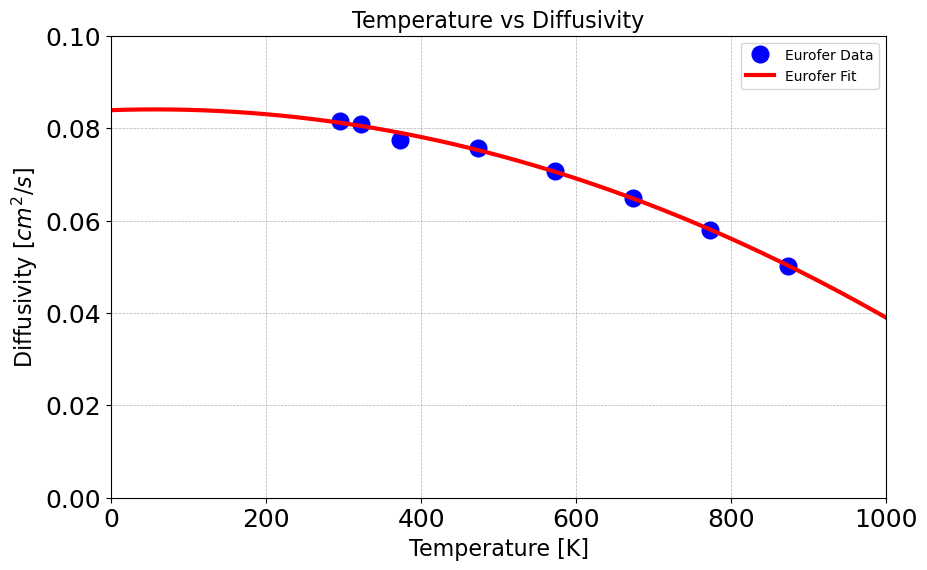

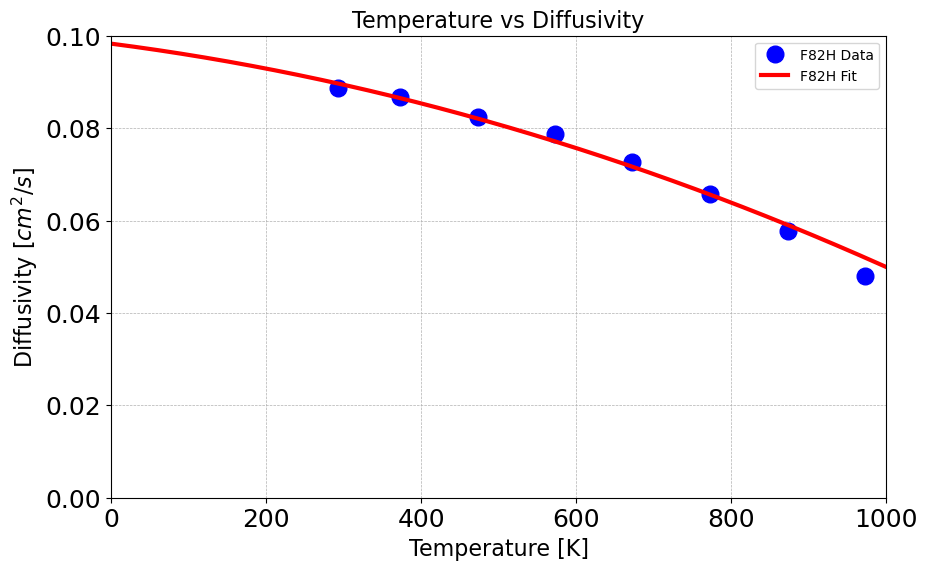

In [2]:
import import_ipynb
import pandas as pd
import numpy as np
from IPython.display import display, Markdown, Math, HTML
from Utilities import calculate_fit_parameters, display_fitting_parameters, quadratic_model, custom_plot

# Load the data from the Excel file
diffusivity_col_names = ["Temp (K)", "Thermal Diffusivity Coef. (cm2/s)",\
                        "Temp (K)", "Thermal Diffusivity Coef. (cm2/s)"]

diffusivity_data =\
    pd.read_excel('Eurofer_data.xlsx',\
        sheet_name="Diffusivity", header=1, usecols=[0,1,3,4], \
                  names=diffusivity_col_names)

T_euro, Diff_euro, T_f82h, Diff_f82h= \
    [diffusivity_data[col].dropna().to_numpy() for col in diffusivity_data]

# Call the function and get the output and optimized parameters
output_euro, popt_euro = calculate_fit_parameters(T_euro, Diff_euro)
output_f82h, popt_f82h = calculate_fit_parameters(T_f82h, Diff_f82h)

# Display fitting parameters and LaTeX equation for Eurofer 97 and F82H
display_fitting_parameters('Eurofer 97', output_euro, popt_euro)
display_fitting_parameters('F82H', output_f82h, popt_f82h)
 
# Generate fitted data for Eurofer 97 and F82H
T_fit = np.linspace(0, 1000, 200)
Diff_fit_euro = quadratic_model(T_fit, *popt_euro)
Diff_fit_f82h = quadratic_model(T_fit, *popt_f82h)

# Plot the data
custom_plot(T_euro, Diff_euro, T_fit, Diff_fit_euro, 
            x_label='Temperature [K]', y_label='Diffusivity [$cm^2/s$]', 
            title='Temperature vs Diffusivity', 
            data_label='Eurofer Data', fit_label='Eurofer Fit',
            scale='linear', xlim=(0, 1000), ylim=(0, 0.1))
custom_plot(T_f82h, Diff_f82h, T_fit, Diff_fit_f82h, 
            x_label='Temperature [K]', y_label='Diffusivity [$cm^2/s$]', 
            title='Temperature vs Diffusivity', 
            data_label='F82H Data', fit_label='F82H Fit',
            scale='linear', xlim=(0, 1000), ylim=(0, 0.1))
